In [1]:
import numpy as np
import sklearn as sk
import os
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
import requests
from io import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import heapq
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import TruncatedSVD
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import re
from wordcloud import WordCloud

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\brady\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
print(gutenberg.fileids())
paradise_lost_tokens = gutenberg.words('milton-paradise.txt')

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brady\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brady\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brady\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


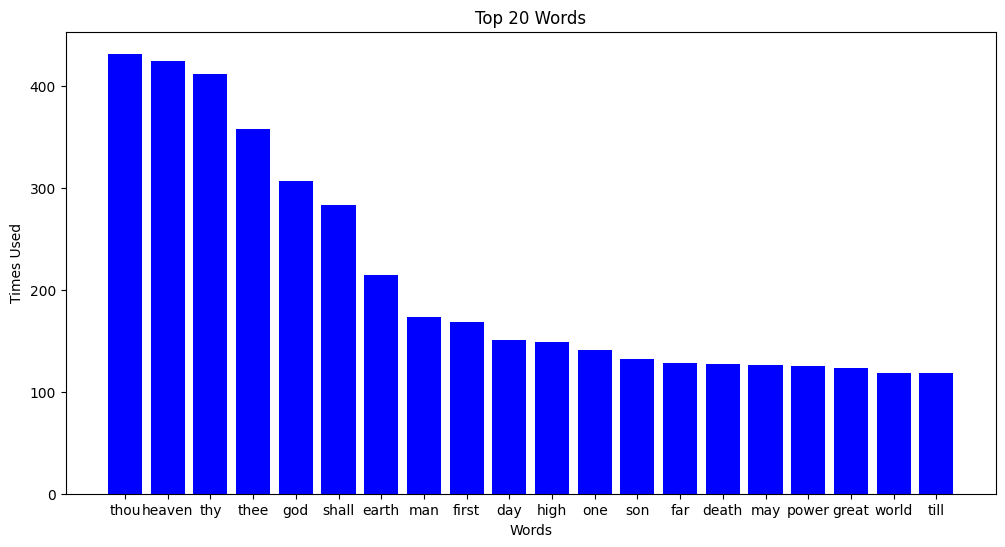

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))
additional_stopwords = {'thus', 'yet', 'though'} #these are words that were originally in the top 20 but I would assume classify as 'meaningless' words 
stop_words.update(additional_stopwords)

paradise_lost_text = nltk.corpus.gutenberg.raw('milton-paradise.txt')

tokens = word_tokenize(paradise_lost_text)

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens
                     if token.isalpha() and token.lower() not in stop_words and len(token)>2] 
#the length requirement is to get rid of 'u' which was in the top 20. for some reason length>1 didnt work but length>2 did

word_counts = Counter(lemmatized_tokens)

top_words = word_counts.most_common(20)
top_words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(top_words, counts, color='blue')
plt.title('Top 20 Words')
plt.xlabel('Words')
plt.ylabel('Times Used')
plt.show()

I mainly used lemmatization instead of stemming because of the examples we had in class the other day where there were quite a few instances of stemming just returning the wrong word. I think one example we said was that it returned table as tabl. Another one I found is it returned science as scienc. In general, lemmatization just seemed more consistent than stemming.

In [5]:
nltk.download('vader_lexicon')

paradise_lost_text = nltk.corpus.gutenberg.raw('milton-paradise.txt')
paradise_lost_text = paradise_lost_text.replace(';', '.')
# this line might take away from a few sentences but without this line my 'sentences' were originally whole pargaphs since
# a group of words is only a 'sentence' if it ends with a period, exclamation point, or question mark

sentences = sent_tokenize(paradise_lost_text)

sid = SentimentIntensityAnalyzer()

def get_sentiment_score(sentence):
    return sid.polarity_scores(sentence)['compound']

sentiment_scores = [(get_sentiment_score(sentence), sentence) for sentence in sentences]

most_negative = heapq.nsmallest(5, sentiment_scores)
most_positive = heapq.nlargest(5, sentiment_scores)
most_neutral = [(score, sentence) for score, sentence in sentiment_scores if score >= -0.02 and score <= 0.02]

print("5 Most Positive Sentences:")
for score, sentence in most_positive:
    print(score, '\n', sentence)
    
print("\n5 Most Negative Sentences:")
for score, sentence in most_negative:
    print(score, '\n', sentence)

print("\n5 Most Neutral Sentences:")
for score, sentence in most_neutral[:5]:
    print(score, '\n', sentence)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brady\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


5 Most Positive Sentences:
0.9892 
 Fair Angel, thy desire, which tends to know 
The works of God, thereby to glorify 
The great Work-master, leads to no excess 
That reaches blame, but rather merits praise 
The more it seems excess, that led thee hither 
From thy empyreal mansion thus alone, 
To witness with thine eyes what some perhaps, 
Contented with report, hear only in Heaven: 
For wonderful indeed are all his works, 
Pleasant to know, and worthiest to be all 
Had in remembrance always with delight.
0.9838 
 and from thence 
Magnanimous to correspond with Heaven, 
But grateful to acknowledge whence his good 
Descends, thither with heart, and voice, and eyes 
Directed in devotion, to adore 
And worship God Supreme, who made him chief 
Of all his works:  therefore the Omnipotent 
Eternal Father (for where is not he 
Present?)
0.9827 
 But well thou comest 
Before thy fellows, ambitious to win 
From me some plume, that thy success may show 
Destruction to the rest:  This pause betwe

Before I even address the positivity, negativity, and neutralness of the scores I want to point out the pretty obvious fact that the length of these sentences is incredibly long. The reason for this is that a group of words is only a 'sentence' if it ends with a period, exclamation point, or question mark. I was able to reduce this issue a lot by counting semicolons as periods, but some lines just don't really have any punctuation at all.
As far as the actual 'scores' of the sentences, I would say most of them are fairly accurate. There are a few exceptions such as the third positive sentence which touches on the idea of destruction. Since measuring exaclty how positive or negative a given setence is is quite subjectives, it's hard to say if the actual numbers associated with the sentences are correct, but I would agree that the positive sentences are fairly positive and etc.

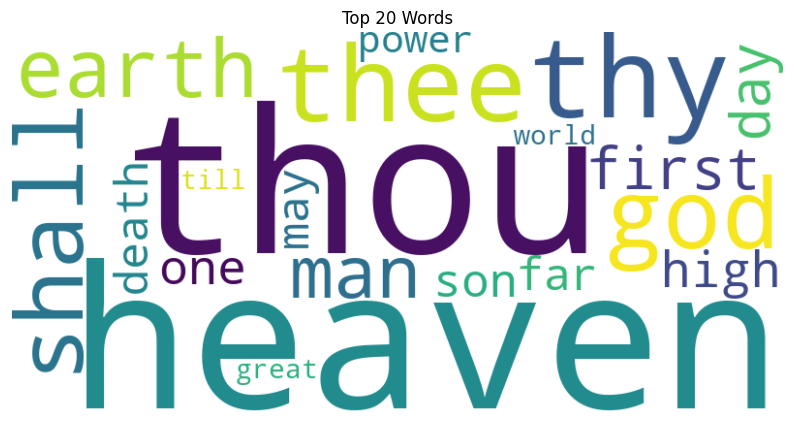

In [6]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
top_words = sorted_word_counts[:20]
# had to redefine this since originally I was getting an error when using top_words since it was a tuple

top_words, counts = zip(*top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, counts)))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words')
plt.show()